In [117]:
%matplotlib inline

# supress warning
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import OutlierDetection as od
plt.style.use('default')

In [119]:
# set the csv file path
inputFile = "../../data/2014-data/58900903_telematics_agata_v3__final.csv"

# read the csv dataset and drop the missing value
df_full = pd.read_csv(inputFile)
df = df_full[["ertrag","durchsatz"]].dropna()

df.head()

,ertrag,durchsatz
411,6.410,4.886
412,9.281,25.461
413,10.590,27.051
414,9.941,29.741
415,10.444,32.830


# GBOD Basic Algorithm

In [120]:
# Setting
n_partition = 20
outlier_percent = 0.5

# initialize GBOD object
myGBOD = od.GBOD(df, n_partition=n_partition, outlier_percent=outlier_percent)

In [121]:
# rund the GBOD function
result, grid_info = myGBOD.run_GBOD()

In [122]:
result.head()

,ertrag,durchsatz,ertrag_norm,durchsatz_norm,ertrag_partition,durchsatz_partition,pred_grid_label
411,6.410,4.886,8.545903,1.070943,8,1,no
412,9.281,25.461,12.374158,5.581620,12,5,no
413,10.590,27.051,14.119608,5.930197,14,5,no
414,9.941,29.741,13.254217,6.519928,13,6,no
415,10.444,32.830,13.924928,7.197132,13,7,no


In [101]:
grid_info.head()

,,points,cum_sum,pred_grid_label
ertrag_partition,durchsatz_partition,,,
2,13,1,1,yes
17,19,1,2,yes
0,13,1,3,yes
6,17,1,4,yes
13,18,1,5,yes


# Center Based View

In [123]:
result_cb, grid_info_cb = myGBOD.run_GBOD_center_bias(outlier_grid_frac=0.5)
result_cb.head()

outlier_gird_frac = 0.5


,ertrag,durchsatz,ertrag_norm,durchsatz_norm,ertrag_partition,durchsatz_partition,center_bias_label
411,6.410,4.886,8.545903,1.070943,8,1,no
412,9.281,25.461,12.374158,5.581620,12,5,no
413,10.590,27.051,14.119608,5.930197,14,5,yes
414,9.941,29.741,13.254217,6.519928,13,6,no
415,10.444,32.830,13.924928,7.197132,13,7,no


In [124]:
grid_info_cb.head()

,,ertrag_center,durchsatz_center,ertrag_norm_center,durchsatz_norm_center,ertrag_partition_center,durchsatz_partition_center,center_diff,center_bias_label
ertrag_partition,durchsatz_partition,,,,,,,,
19,19,14.818545,76.111773,19.758044,16.685836,19.5,19.5,2.825970,yes
2,14,2.227000,64.078000,2.968198,14.047661,2.5,14.5,0.651015,yes
17,19,12.758000,87.553000,17.010467,19.194107,17.5,19.5,0.577246,yes
13,18,9.783000,82.903000,13.043536,18.174683,13.5,18.5,0.560527,yes
3,15,2.733000,68.441000,3.642910,15.004165,3.5,15.5,0.516019,yes


# Plot

## Cell Histogram

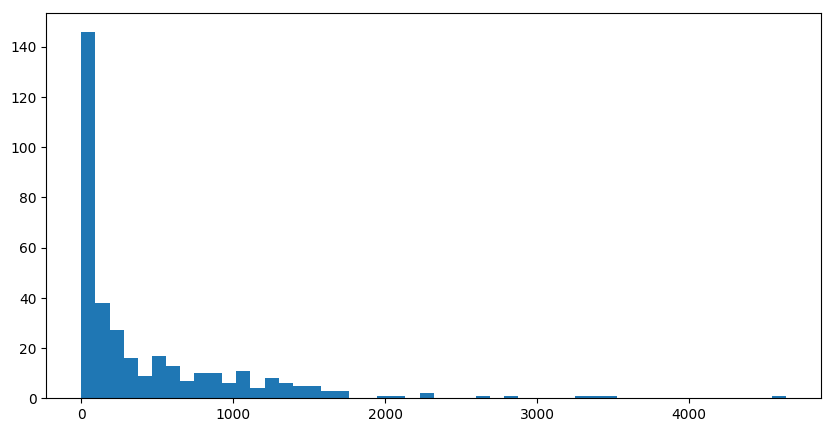

In [104]:
myGBOD.plotGridHist(bins=50)

## Heatmap

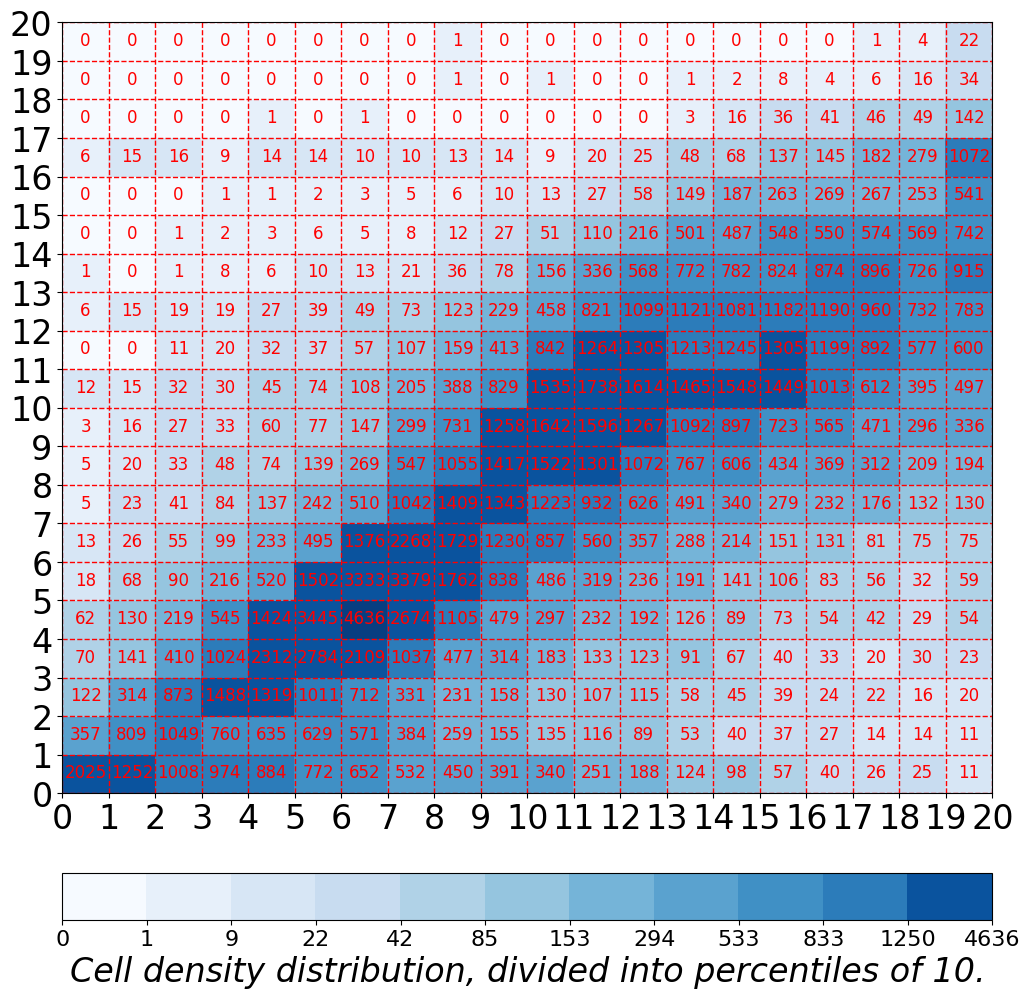

In [105]:
myGBOD.plotGridHeatMap(fontsize=12)

## Plot result from GBOD basic Algorithm

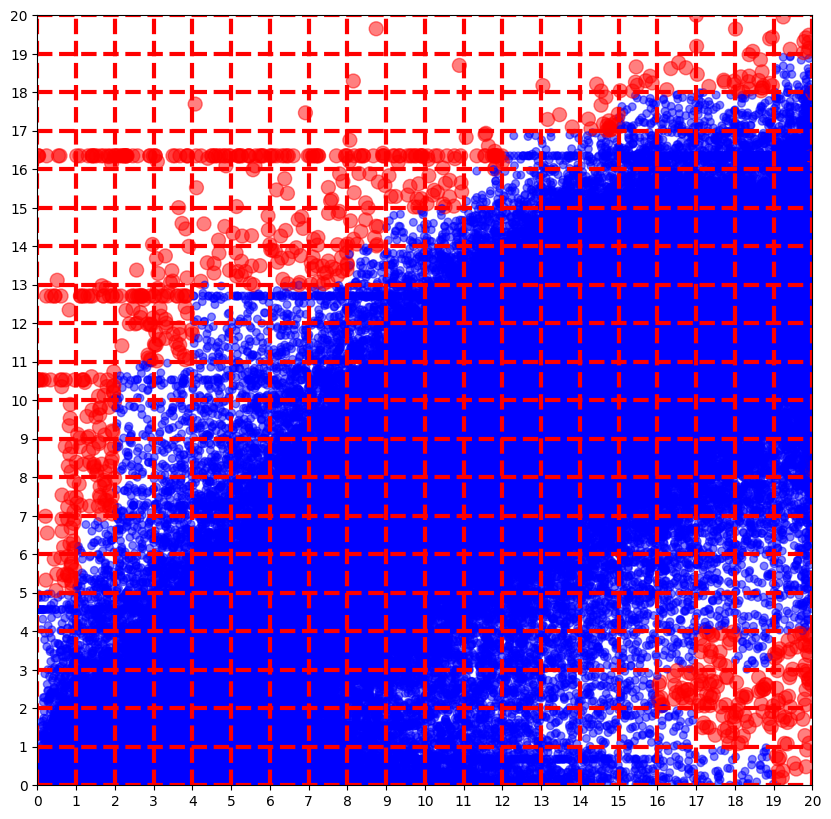

In [106]:
myGBOD.plotOutliers()

## Plot center based View

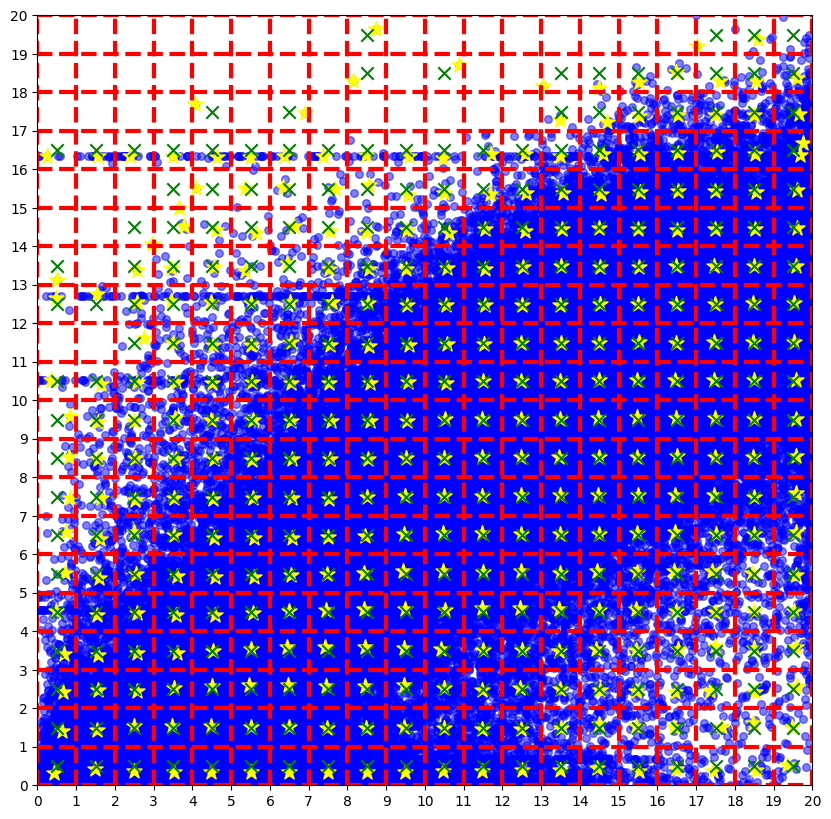

In [107]:
myGBOD.plot_df_norm()

## Plot outliers found by GBOD center biased algorithm

outlier_percent = 0.5
outlier_gird_frac = 0.21468926553672316


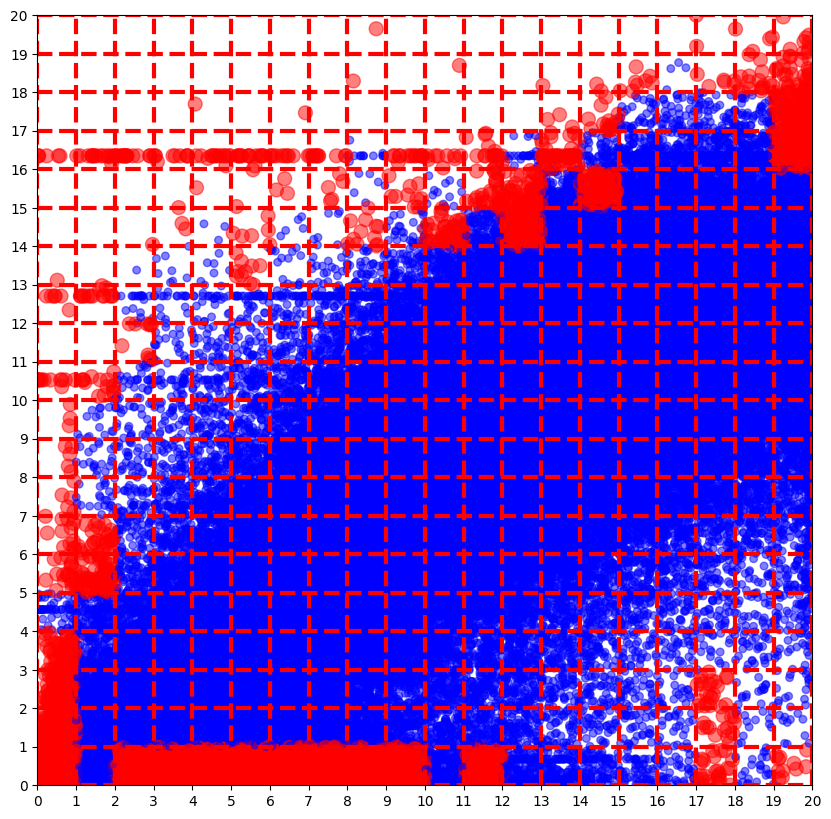

In [108]:
myGBOD.plotOutliers_CenterBias()

# GBOD Score

In [110]:
# Setting und rund GBOD score function
res_score = od.GBOD_P(df, partition_range=[5,20], outlier_percent=0.25)
res_score.head()

,p=5,p=6,p=7,p=8,p=9,p=10,p=11,p=12,p=13,p=14,p=15,p=16,p=17,p=18,p=19,score
411,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0
412,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0
413,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0
414,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0
415,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0


In [111]:
res_score.head()

,p=5,p=6,p=7,p=8,p=9,p=10,p=11,p=12,p=13,p=14,p=15,p=16,p=17,p=18,p=19,score
411,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0
412,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0
413,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0
414,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0
415,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,0


In [113]:
# plot the result
res_df = df.copy()
res_df['score'] = res_score.score
res_df['label'] = res_df.apply(lambda x: 'red' if x.score>0 else 'blue', axis=1)

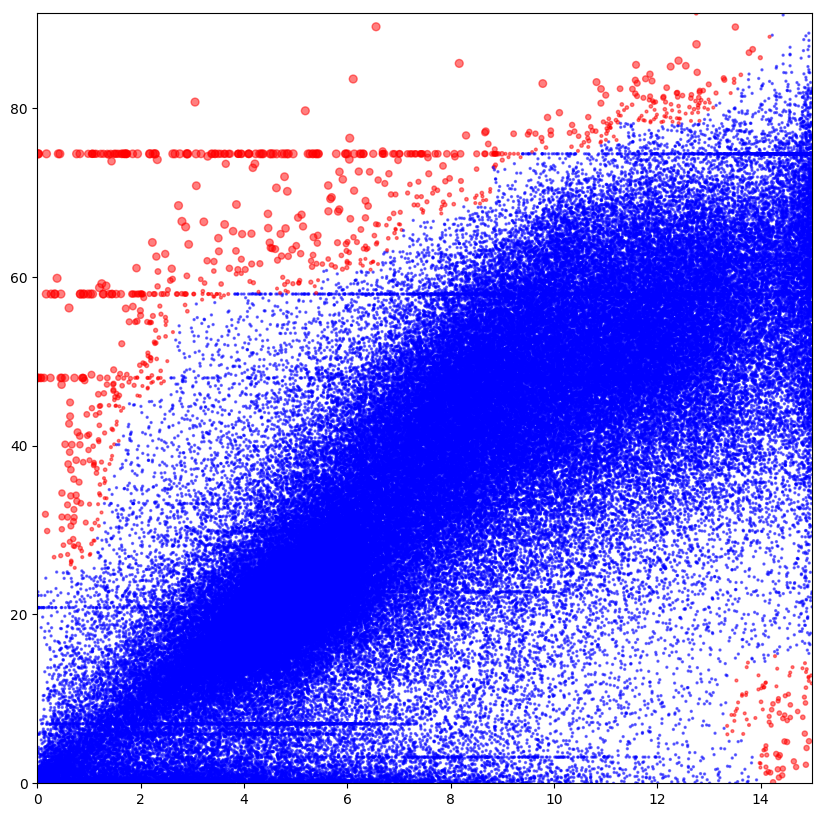

In [114]:
plt.figure(figsize=(10,10))
plt.xlim(res_df.ertrag.min(), res_df.ertrag.max())
plt.ylim(res_df.durchsatz.min(), res_df.durchsatz.max())
plt.scatter(x=res_df.ertrag, y=res_df.durchsatz, s=(res_df.score+1)*2, c=res_df.label, alpha=.5)

# KD-KNN

In [ ]:
myKDKNN = od.KDKNN(df, k=5)

In [ ]:
res_kdknn = myKDKNN.run_KDKNN(outlier_percent=0.25)

In [115]:
res_kdknn.head()

,ertrag,durchsatz,ertrag_norm,durchsatz_norm,score,label
411,6.410,4.886,4.272952,0.535472,0.034171,no
412,9.281,25.461,6.187079,2.790810,0.016555,no
413,10.590,27.051,7.059804,2.965098,0.034236,no
414,9.941,29.741,6.627108,3.259964,0.030747,no
415,10.444,32.830,6.962464,3.598566,0.025692,no
